# <center>The Battle of Neighborhoods - Mumbai</center>

## <center>Applied Data Science Capstone by IBM on Coursera</center>

## Table of contents
1. [Introduction: Business Problem](#intro)
2. [Data Requirements](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results](#results)
6. [Discussion](#discussion)
7. [Conclusion](#conclusion)

## Introduction: Business Problem <a name="intro"></a>

This project deals with discussing the neighborhoods of **Mumbai, The Financial Hub of India**. This project would specifically help Business people planning to start **Restaurants, Hotels, etc.** in Mumbai, Maharashtra, India.

Mumbai, formerly known as Bombay, capital of Maharashtra state, India. It is the country’s financial and commercial centre and its principal port on the Arabian Sea. Located on Maharashtra’s coast, Mumbai is India’s most-populous city and it is one of the largest and most densely populated urban areas in the world. Mumbai is home for 1.84 Cr people. The total area of Mumbai is 603.4 sq.km. Average temperature of Mumbai is 26.9°C.

**Mumbai - City that never Sleeps**

The **Foursquare API** is used to access the venues in the neighborhoods. Since, it returns less venues in the neighborhoods, we would be analysing areas for which countable number of venues are obtained. Then they are clustered based on their venues using Data Science Techniques. Here the **k-means clustering algorithm** is used to achieve the task. The optimal number of clusters can be obtained using **silhouette score**. **Folium visualization library** can be used to visualize the clusters superimposed on the map of Chennai city. These clusters can be analyzed to help small scale business owners select a suitable location for their need such as Hotels, Shopping Malls, Restaurants or even specifically Indian restaurants or Coffee shops.

#### Import the required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import folium # map rendering library
from bs4 import BeautifulSoup #importing BeautifulSoup library for web scraping

print('Libraries imported.')

Libraries imported.


## Data Requirements <a name="data"></a>

Mumbai has multiple neighborhoods. Lets use the following dataset which has the list of Neighborhoods in Mumbai along with their Latitude and Longitude:

https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Mumbai_neighbourhood_coordintes

This Wikipedia page contains a table named “Mumbai neighbourhood coordinates”. We will use web scraping techniques to extract the data from the Wikipedia page, with the help of Python requests and beautifulsoup packages.

### Using BeautifulSoup library to Scrape data from Wikipedia page

In [3]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Mumbai_neighbourhood_coordintes')
url

<Response [200]>

In [4]:
df = pd.read_html(url.text)
df

[                                            Area  \
 0                                         Amboli   
 1                               Chakala, Andheri   
 2                                     D.N. Nagar   
 3                                 Four Bungalows   
 4                                    Lokhandwala   
 5                                          Marol   
 6                                          Sahar   
 7                                Seven Bungalows   
 8                                        Versova   
 9                                      Mira Road   
 10                                     Bhayandar   
 11                                         Uttan   
 12                           Bandstand Promenade   
 13                                      Kherwadi   
 14                                     Pali Hill   
 15                                   I.C. Colony   
 16                                         Gorai   
 17                                        Dah

In [5]:
len(df) , type(df)

(1, list)

In [6]:
df = df[0]
df

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [7]:
df.dtypes

Area          object
Location      object
Latitude     float64
Longitude    float64
dtype: object

In [8]:
new_df = df.copy()
new_df

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [14]:
new_df.columns = ['Neighbourhood','Location','Latitude','Longitude']
new_df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


##### Manually correcting some wrong Latitude and Longitude Values

In [15]:
new_df.at[41,'Latitude'] = 19.0640
new_df.at[41,'Longitude'] = 72.8826
new_df.at[82,'Latitude'] = 19.0197
new_df.at[82,'Longitude'] = 72.8479
new_df.at[68,'Latitude'] = 18.9865
new_df.at[68,'Longitude'] = 72.8183

new_df

,Neighbourhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### Get Geographical Co-oridnates of Mumbai

In [16]:
address = 'Mumbai, India'
geolocator = Nominatim(user_agent= 'mumbai_explorer')
location = None
while(location is None):
    location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


### Create a map of Mumbai with Neighbourhoods superimposed on top

In [17]:
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area in zip(new_df['Latitude'], new_df['Longitude'], new_df['Neighbourhood']):
    label = '{},Mumbai,India'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)

In [18]:
map_mumbai

### Using Foursquare API to explore neighbourhood

In [19]:
Client_id = 'TXBM3IS4LVEOOESUS4ZC3XICBK2AE14SZCQMRP3L20S4U5GU'# Your client id
Client_secret = 'G0RKMXY1BUGJEKXSAWPEYPAJYLNYIQG2PVLX4RRMTF1DWL4V' # Your client secret
Version = '20180605' # Foursquare API version

##### Now let's get the top 100 venues within 500 meters

In [20]:
radius = 500
limit = 100
venues = []
for lat,long,area,location in zip(new_df['Latitude'], new_df['Longitude'], new_df['Neighbourhood'], new_df['Location']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        Client_id,
        Client_secret,
        Version,
        lat,
        long,
        radius, 
        limit)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
            venues.append((
            area,
            location,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [21]:
venues

[('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Cafe Arfa',
  19.12893009094341,
  72.84714004510111,
  'Indian Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  '5 Spice , Bandra',
  19.130421080343595,
  72.84720633881638,
  'Chinese Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Subway',
  19.1278600430168,
  72.84446095143547,
  'Sandwich Place'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Cafe Coffee Day',
  19.127748138225197,
  72.84466295105099,
  'Coffee Shop'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Spices & Chillies',
  19.127765125226006,
  72.84413112931281,
  'Asian Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Delhi Zaika',
  19.132159,
  72.844406,
  'Halal Restaurant'),
 ('Amboli',
  'Andheri,Western Suburbs',
  19.1293,
  72.8434,
  'Bhardawadi Ground',
  19.12614307830214,
  72.84354839292276,
  'Park'),
 

In [22]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Location', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1365, 8)


,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Spices & Chillies,19.127765,72.844131,Asian Restaurant


##### Let's find out how many unique categories can be curated from all the returned venues

In [23]:
venues_df[venues_df['Neighbourhood']=='Amboli']

,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Spices & Chillies,19.127765,72.844131,Asian Restaurant
5,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Delhi Zaika,19.132159,72.844406,Halal Restaurant
6,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Bhardawadi Ground,19.126143,72.843548,Park
7,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Nukkad Food Bistro,19.126058,72.846618,Fast Food Restaurant


#### A total of 1365 venues were obtained. Now lets check the number of venues returned per neighborhood.

##### No of unique categories in Venue

In [29]:
uniquevenues = len(venues_df.VenueCategory.unique())
uniquevenues

181

In [30]:
venues_df['VenueCategory'].unique()[:50]

array(['Indian Restaurant', 'Chinese Restaurant', 'Sandwich Place',
       'Coffee Shop', 'Asian Restaurant', 'Halal Restaurant', 'Park',
       'Fast Food Restaurant', 'Hotel', 'Cocktail Bar', 'Café',
       'Falafel Restaurant', 'Pizza Place', 'Restaurant',
       'Seafood Restaurant', 'Multiplex', 'Liquor Store',
       'Ice Cream Shop', 'Gym / Fitness Center', 'Snack Place',
       'Playground', 'Vegetarian / Vegan Restaurant', 'Juice Bar',
       "Women's Store", 'Fish Market',
       'Residential Building (Apartment / Condo)', 'Market', 'Bar',
       'Bakery', 'Gym', 'Sports Club', 'Electronics Store', 'Pub',
       'Lounge', 'Concert Hall', 'Supermarket', 'Department Store',
       'Train Station', 'Shopping Mall', 'Diner', 'Flea Market', 'Food',
       'South Indian Restaurant', 'Bistro', 'Recreation Center',
       'Dessert Shop', 'Creperie', 'Salon / Barbershop', 'Clothing Store',
       'Food Truck'], dtype=object)

In [31]:
venues_df['VenueCategory'].value_counts()

Indian Restaurant                           174
Café                                         81
Fast Food Restaurant                         57
Coffee Shop                                  54
Bakery                                       46
Bar                                          44
Chinese Restaurant                           41
Ice Cream Shop                               39
Pizza Place                                  33
Restaurant                                   32
Hotel                                        28
Dessert Shop                                 28
Italian Restaurant                           26
Snack Place                                  23
Seafood Restaurant                           20
Sandwich Place                               18
Vegetarian / Vegan Restaurant                17
Lounge                                       15
Asian Restaurant                             14
Electronics Store                            13
Clothing Store                          

In [38]:
grouped_venues = venues_df.groupby(["Neighbourhood"])
grouped_venues.head(10)

,Neighbourhood,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Spices & Chillies,19.127765,72.844131,Asian Restaurant
5,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Delhi Zaika,19.132159,72.844406,Halal Restaurant
6,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Bhardawadi Ground,19.126143,72.843548,Park
7,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,Nukkad Food Bistro,19.126058,72.846618,Fast Food Restaurant
8,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Courtyard Mumbai International Airport,19.114167,72.864131,Hotel
9,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Faaso's,19.113938,72.862330,Fast Food Restaurant


In [36]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 181 uniques categories.


## Methodology <a name="methodology"></a>

Now, we have the neighborhoods data of Mumbai (**93 neighborhoods**). We also have the most popular venues in each neighborhood obtained using Foursquare API. A total of **1365 venues** have been obtained in the whole city and **181 unique categories**. But as seen we have multiple neighborhoods with less than 10 venues returned. In order to create a good analysis let's consider only the **_neighborhoods with more than 10 venues_**.

We can perform one hot encoding on the obtained data set and use it find the **10 most common venue category** in each neighborhood. Then clustering can be performed on the dataset. Here **K - Nearest Neighbor** clustering technique have been used. To find the optimal number of clusters **silhouette score** metric technique is used.

The clusters obtained can be analyzed to find the major type of venue categories in each cluster. This data can be used to suggest business people, suitable locations based on the category.

## Analysis <a name="analysis"></a>

First, lets visualize the number of venues obtained in all the neighborhoods of Mumbai.

In [39]:
venues_df.groupby(["Neighbourhood"]).count()

,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighbourhood,,,,,,,
Agripada,5,5,5,5,5,5,5
Altamount Road,8,8,8,8,8,8,8
Amboli,8,8,8,8,8,8,8
Amrut Nagar,40,40,40,40,40,40,40
Asalfa,2,2,2,2,2,2,2
Ballard Estate,6,6,6,6,6,6,6
Bandstand Promenade,15,15,15,15,15,15,15
Bangur Nagar,4,4,4,4,4,4,4
Bhandup,12,12,12,12,12,12,12


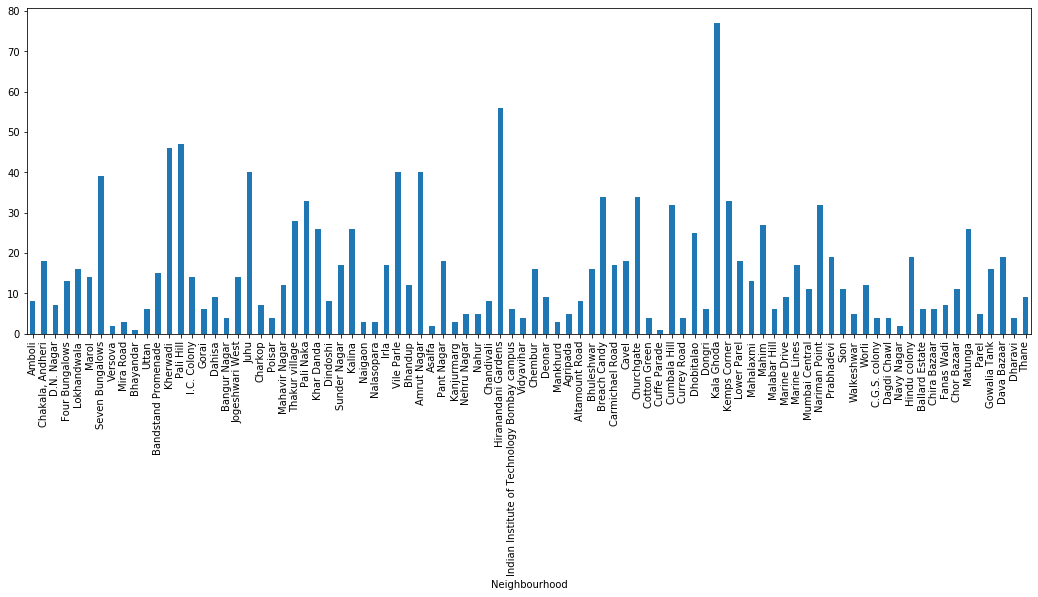

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
dff = venues_df.groupby(['Neighbourhood'], sort=False)['VenueName'].count()
dff.plot.bar(figsize=(18,6))
plt.show()

As we can see from the above bar chart, there are many neighborhoods with less than 10 venues which can be remove before performing the analysis to obtain better results. The following plot shows only the neighborhoods from which 10 or more than 10 venues were obtained.

In [52]:
dff.head()

Neighbourhood
Amboli               8
Chakala, Andheri    18
D.N. Nagar           7
Four Bungalows      13
Lokhandwala         16
Name: VenueName, dtype: int64

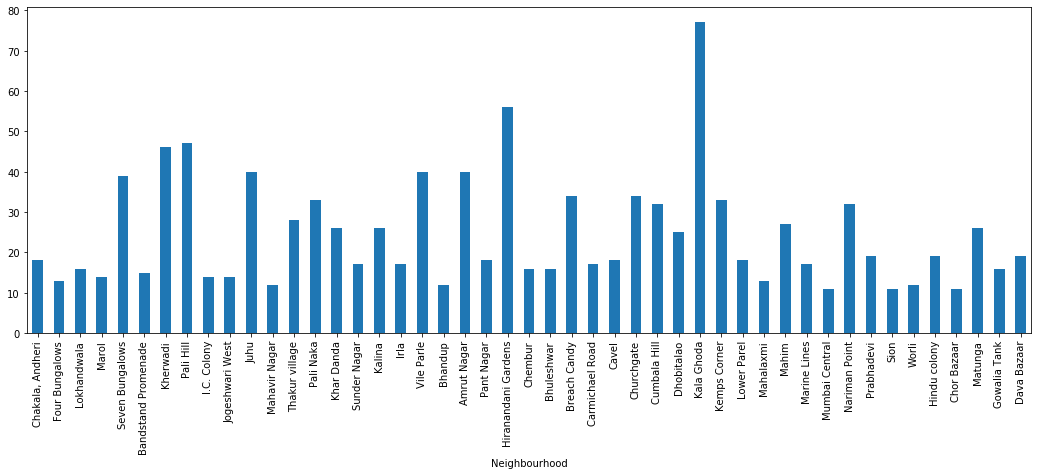

In [53]:
dff = dff[dff >= 10]
dff.plot.bar(figsize=(18,6))
plt.show()

### Analyzing each Neighbourhood

In [54]:
mum_onehot = pd.get_dummies(venues_df["VenueCategory"], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
mum_onehot['Neighbourhoods'] = venues_df['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [mum_onehot.columns[-1]] + list(mum_onehot.columns[:-1])
mum_onehot = mum_onehot[fixed_columns]

print(mum_onehot.shape)
mum_onehot.head()

#### 1 in Indian Restraunt of first Row 

(1365, 182)


,Neighbourhoods,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,1,0,0,

##### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

#### From these we will get to know that Which Neigbourhood is having how much occurrences of Each Venue Category

In [55]:
mum_grouped = mum_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(mum_grouped.shape)
mum_grouped.head(10)

(88, 182)


,Neighbourhoods,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.200000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Altamount Road,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0

#### Now Based on the occurences of Each Venue Category in Each Neighbourhood , we will explore top 10 most Occurence Of VenueCategory in each Neighborhood

In [56]:
num_top_venues = 10

for hood in mum_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
                venue  freq
0              Bakery   0.2
1   Indian Restaurant   0.2
2         Coffee Shop   0.2
3                 Gym   0.2
4          Restaurant   0.2
5        Noodle House   0.0
6       Moving Target   0.0
7  Mughlai Restaurant   0.0
8           Multiplex   0.0
9         Music Store   0.0


----Altamount Road----
                  venue  freq
0                  Café  0.25
1                Bakery  0.12
2     Indian Restaurant  0.12
3  Fast Food Restaurant  0.12
4           Coffee Shop  0.12
5               Theater  0.12
6        Sandwich Place  0.12
7          Noodle House  0.00
8             Multiplex  0.00
9           Music Store  0.00


----Amboli----
                  venue  freq
0     Indian Restaurant  0.12
1                  Park  0.12
2      Halal Restaurant  0.12
3      Asian Restaurant  0.12
4  Fast Food Restaurant  0.12
5           Coffee Shop  0.12
6        Sandwich Place  0.12
7    Chinese Restaurant  0.12
8     Afghan Restaurant  0.00
9  

                     venue  freq
0                   Garden   1.0
1        Afghan Restaurant   0.0
2  New American Restaurant   0.0
3      Monument / Landmark   0.0
4            Movie Theater   0.0
5            Moving Target   0.0
6       Mughlai Restaurant   0.0
7                Multiplex   0.0
8              Music Store   0.0
9              Music Venue   0.0


----Cumbala Hill----
                venue  freq
0                Café  0.12
1              Bakery  0.06
2         Coffee Shop  0.06
3           Bookstore  0.03
4             Brewery  0.03
5         Snack Place  0.03
6          Smoke Shop  0.03
7         Bus Station  0.03
8  Chinese Restaurant  0.03
9      Sandwich Place  0.03


----Currey Road----
                      venue  freq
0                     Plaza  0.25
1         Indian Restaurant  0.25
2               Coffee Shop  0.25
3  Maharashtrian Restaurant  0.25
4         Afghan Restaurant  0.00
5                 Nightclub  0.00
6             Moving Target  0.00
7        Mug


----Kala Ghoda----
                  venue  freq
0     Indian Restaurant  0.21
1                  Café  0.06
2           Coffee Shop  0.05
3          Dessert Shop  0.04
4  Fast Food Restaurant  0.04
5    Seafood Restaurant  0.04
6              Boutique  0.03
7                 Hotel  0.03
8        Clothing Store  0.03
9    Chinese Restaurant  0.03


----Kalina----
                       venue  freq
0          Indian Restaurant  0.12
1                     Bakery  0.08
2                Yoga Studio  0.08
3                       Food  0.04
4                Snack Place  0.04
5  Middle Eastern Restaurant  0.04
6                     Market  0.04
7     Furniture / Home Store  0.04
8             Clothing Store  0.04
9         Chinese Restaurant  0.04


----Kanjurmarg----
                venue  freq
0              Bakery  0.33
1   Indian Restaurant  0.33
2           Multiplex  0.33
3        Noodle House  0.00
4       Movie Theater  0.00
5       Moving Target  0.00
6  Mughlai Restaurant  0.00
7  

9              Music Store   0.0


----Nehru Nagar----
                           venue  freq
0                 Cricket Ground   0.2
1  Vegetarian / Vegan Restaurant   0.2
2                     Food Truck   0.2
3             Chinese Restaurant   0.2
4              Convenience Store   0.2
5                       Pharmacy   0.0
6                   Noodle House   0.0
7                    Pizza Place   0.0
8             Mughlai Restaurant   0.0
9                      Multiplex   0.0


----Pali Hill----
                     venue  freq
0     Fast Food Restaurant  0.11
1                   Bakery  0.09
2             Cupcake Shop  0.06
3       Italian Restaurant  0.06
4           Ice Cream Shop  0.06
5             Dessert Shop  0.06
6                BBQ Joint  0.04
7             Noodle House  0.02
8                     Café  0.02
9  New American Restaurant  0.02


----Pali Naka----
                venue  freq
0   Indian Restaurant  0.12
1              Bakery  0.09
2       Deli / Bodega  0.06
3

### Create new Dataframe with 10 most common venues cateogories in each Neighbourhood

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = mum_grouped['Neighbourhoods']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Restaurant,Gym,Coffee Shop,Indian Restaurant,Bakery,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
1,Altamount Road,Café,Bakery,Fast Food Restaurant,Coffee Shop,Sandwich Place,Theater,Indian Restaurant,Yoga Studio,Farmers Market,Falafel Restaurant
2,Amboli,Halal Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Gourmet Shop,Greek Restaurant
3,Amrut Nagar,Indian Restaurant,Café,Clothing Store,Fast Food Restaurant,Electronics Store,Asian Restaurant,Afghan Restaurant,Bookstore,Sandwich Place,Bowling Alley
4,Asalfa,Food Truck,Campground,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store


In [61]:
##### Verifying Amboli
mum_grouped[mum_grouped['Neighbourhoods']=='Amboli']

,Neighbourhoods,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
2,Amboli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [63]:
max_range = 10

mum_grouped_clustering = mum_grouped.drop('Neighbourhoods', axis = 1)
mum_grouped_clustering.head()

,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.2,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.200,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.125,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,

In [64]:
mum_grouped_clustering.shape

(88, 181)

### Cluster Neighbourhoods -- Venue Categories which is One Hot Encoded and Mean is calculated for each Neighborhood

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = mum_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

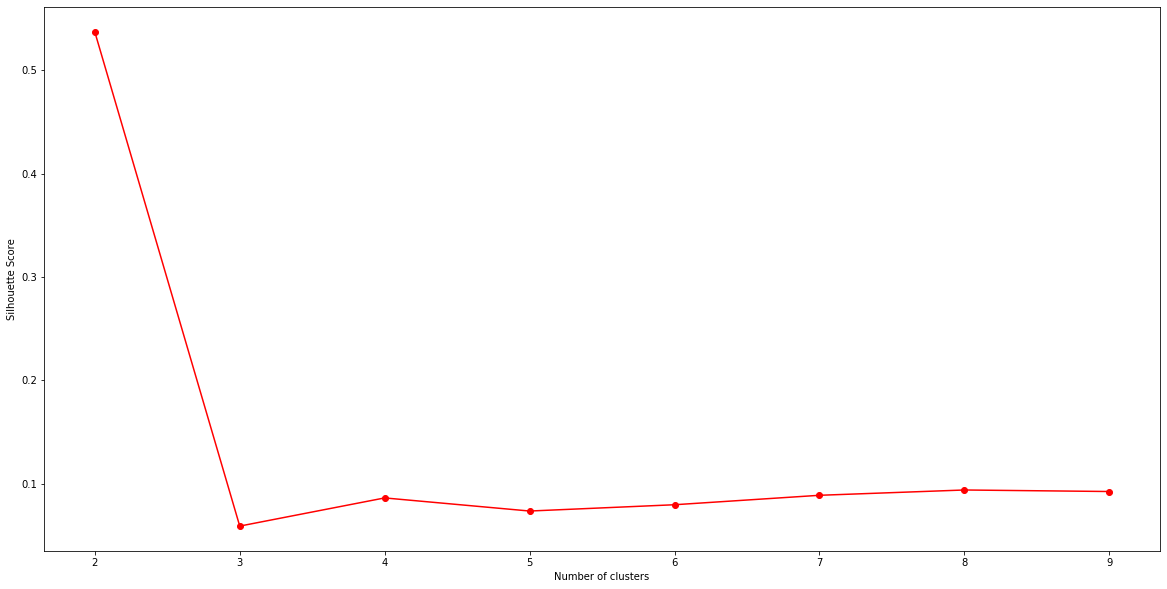

In [66]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_range), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_range))
plt.show()

In [68]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(mum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

In [69]:
# add clustering labels
venues_sorted = neighborhoods_venues_sorted
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [70]:
mumbai_merged = new_df

# merge mumbai_merged with neighbourhoods_venues_sorted to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

mumbai_merged

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,2.0,Halal Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Gourmet Shop,Greek Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,2.0,Hotel,Multiplex,Café,Restaurant,Fast Food Restaurant,Liquor Store,Ice Cream Shop,Asian Restaurant,Seafood Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,2.0,Gym / Fitness Center,Snack Place,Vegetarian / Vegan Restaurant,Pizza Place,Cocktail Bar,Playground,Indian Restaurant,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,2.0,Bakery,Chinese Restaurant,Market,Electronics Store,Juice Bar,Residential Building (Apartment / Condo),Bar,Sports Club,Fish Market,Vegetarian / Vegan Restaurant
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,2.0,Coffee Shop,Shopping Mall,Women's Store,Indian Restaurant,Liquor Store,Lounge,Market,Department Store,Concert Hall,Cocktail Bar
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,2.0,Indian Restaurant,Snack Place,Ice Cream Shop,Bakery,Hotel,Food,Diner,Flea Market,Vegetarian / Vegan Restaurant,Coffee Shop
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,2.0,Café,Indian Restaurant,Ice Cream Shop,Dessert Shop,Pub,Chinese Restaurant,Bar,Seafood Restaurant,Clothing Store,Pizza Place
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,2.0,Soccer Stadium,Bar,Yoga Studio,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,2.0,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant


In [71]:
mumbai_merged = mumbai_merged.dropna()
mumbai_merged

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,2.0,Halal Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Gourmet Shop,Greek Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,2.0,Hotel,Multiplex,Café,Restaurant,Fast Food Restaurant,Liquor Store,Ice Cream Shop,Asian Restaurant,Seafood Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,2.0,Gym / Fitness Center,Snack Place,Vegetarian / Vegan Restaurant,Pizza Place,Cocktail Bar,Playground,Indian Restaurant,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,2.0,Bakery,Chinese Restaurant,Market,Electronics Store,Juice Bar,Residential Building (Apartment / Condo),Bar,Sports Club,Fish Market,Vegetarian / Vegan Restaurant
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,2.0,Coffee Shop,Shopping Mall,Women's Store,Indian Restaurant,Liquor Store,Lounge,Market,Department Store,Concert Hall,Cocktail Bar
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,2.0,Indian Restaurant,Snack Place,Ice Cream Shop,Bakery,Hotel,Food,Diner,Flea Market,Vegetarian / Vegan Restaurant,Coffee Shop
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,2.0,Café,Indian Restaurant,Ice Cream Shop,Dessert Shop,Pub,Chinese Restaurant,Bar,Seafood Restaurant,Clothing Store,Pizza Place
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,2.0,Soccer Stadium,Bar,Yoga Studio,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,2.0,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant
10,Bhayandar,"Mira-Bhayandar,Western Suburbs",19.290000,72.850000,3.0,Shipping Store,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant


#### Now, let's see how many Neighbourhoods are there in each cluster

In [72]:
print(mumbai_merged['Cluster Labels'].value_counts())

2.0    71
5.0     9
4.0     3
0.0     3
1.0     1
3.0     1
Name: Cluster Labels, dtype: int64


### Let's visualize the resulting clusters

In [73]:
mumbai_merged.head()

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,2.0,Halal Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Gourmet Shop,Greek Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,2.0,Hotel,Multiplex,Café,Restaurant,Fast Food Restaurant,Liquor Store,Ice Cream Shop,Asian Restaurant,Seafood Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,2.0,Gym / Fitness Center,Snack Place,Vegetarian / Vegan Restaurant,Pizza Place,Cocktail Bar,Playground,Indian Restaurant,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,2.0,Bakery,Chinese Restaurant,Market,Electronics Store,Juice Bar,Residential Building (Apartment / Condo),Bar,Sports Club,Fish Market,Vegetarian / Vegan Restaurant
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,2.0,Coffee Shop,Shopping Mall,Women's Store,Indian Restaurant,Liquor Store,Lounge,Market,Department Store,Concert Hall,Cocktail Bar


In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

In [77]:
cluster_colours = ['#0be31a', '#f7df02', '#052ef7', '#f00028', '#f011aa','#02f79e']

In [78]:
# add markers to the map
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighbourhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colours[int(cluster)],
        fill=True,
        fill_color=cluster_colours[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results Summary

Let’s examine the clusters and find the discriminating venue categories that distinguish each cluster. For this purpose lets also print the ten most common venue category in each cluster.

##### Cluster 1

In [82]:
cluster1 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0]
cluster1

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Uttan,"Mira-Bhayandar,Western Suburbs",19.280000,72.785000,0.0,Beach,Playground,Indian Restaurant,Bus Station,Resort,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant
16,Gorai,"Borivali (West),Western Suburbs",19.250057,72.782021,0.0,Resort,Seafood Restaurant,Aquarium,Indian Restaurant,Beach,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
64,Dongri,South Mumbai,19.283333,72.783333,0.0,Beach,Playground,Indian Restaurant,Bus Station,Resort,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant


##### Represented by Green dots in Map

In [83]:
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))

Farmers Market          3
Fast Food Restaurant    3
Yoga Studio             3
Beach                   3
Falafel Restaurant      3
Resort                  3
Indian Restaurant       3
Bus Station             2
Dog Run                 2
Playground              2
dtype: int64


#### Cluster 2

##### Represented by Yellow dot in map

In [84]:
cluster2 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1]
cluster2

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Cuffe Parade,South Mumbai,18.91,72.81,1.0,Garden,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant


In [85]:
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))

Dumpling Restaurant     1
Farmers Market          1
Dog Run                 1
Falafel Restaurant      1
Fast Food Restaurant    1
Yoga Studio             1
Garden                  1
Electronics Store       1
Field                   1
Event Space             1
dtype: int64


#### Cluster 3

##### Represented by Blue dots in map

In [86]:
cluster3 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2]
cluster3

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,2.0,Halal Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Gourmet Shop,Greek Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,2.0,Hotel,Multiplex,Café,Restaurant,Fast Food Restaurant,Liquor Store,Ice Cream Shop,Asian Restaurant,Seafood Restaurant,Pizza Place
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,2.0,Gym / Fitness Center,Snack Place,Vegetarian / Vegan Restaurant,Pizza Place,Cocktail Bar,Playground,Indian Restaurant,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,2.0,Bakery,Chinese Restaurant,Market,Electronics Store,Juice Bar,Residential Building (Apartment / Condo),Bar,Sports Club,Fish Market,Vegetarian / Vegan Restaurant
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,2.0,Coffee Shop,Shopping Mall,Women's Store,Indian Restaurant,Liquor Store,Lounge,Market,Department Store,Concert Hall,Cocktail Bar
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,2.0,Indian Restaurant,Snack Place,Ice Cream Shop,Bakery,Hotel,Food,Diner,Flea Market,Vegetarian / Vegan Restaurant,Coffee Shop
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,2.0,Café,Indian Restaurant,Ice Cream Shop,Dessert Shop,Pub,Chinese Restaurant,Bar,Seafood Restaurant,Clothing Store,Pizza Place
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000,2.0,Soccer Stadium,Bar,Yoga Studio,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,2.0,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant
12,Bandstand Promenade,"Bandra,Western Suburbs",19.042718,72.819132,2.0,Scenic Lookout,Indian Restaurant,Food Truck,Café,Chinese Restaurant,Lounge,Italian Restaurant,Cocktail Bar,Beach,Hotel Bar


In [88]:
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))

Indian Restaurant       46
Fast Food Restaurant    39
Café                    35
Farmers Market          24
Bakery                  22
Coffee Shop             22
Chinese Restaurant      22
Falafel Restaurant      21
Bar                     21
Pizza Place             19
dtype: int64


#### Cluster 4

##### Represented by Red dots in map

In [89]:
cluster4 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3]
cluster4

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Bhayandar,"Mira-Bhayandar,Western Suburbs",19.29,72.85,3.0,Shipping Store,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant


In [90]:
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))

Dumpling Restaurant     1
Farmers Market          1
Dog Run                 1
Event Space             1
Falafel Restaurant      1
Fast Food Restaurant    1
Yoga Studio             1
Electronics Store       1
Field                   1
Shipping Store          1
dtype: int64


#### Cluster 5 

#### Represented by Pink dots in map

In [91]:
cluster5 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4]
cluster5

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Indian Institute of Technology Bombay campus,"Powai,Eastern Suburbs",19.133636,72.915358,4.0,Indian Restaurant,Concert Hall,Café,Coffee Shop,Event Space,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
62,Currey Road,South Mumbai,18.994000,72.833000,4.0,Coffee Shop,Maharashtrian Restaurant,Plaza,Indian Restaurant,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
82,Hindu colony,"Dadar,South Mumbai",19.019700,72.847900,4.0,Indian Restaurant,Coffee Shop,Café,Chinese Restaurant,Fast Food Restaurant,Farmers Market,Vegetarian / Vegan Restaurant,Lounge,Hotel,Bakery


In [92]:
venues5 = (cluster5['1st Most Common Venue'].append(
    cluster5['2nd Most Common Venue']).append(
    cluster5['3rd Most Common Venue']).append(
    cluster5['4th Most Common Venue']).append(
    cluster5['5th Most Common Venue']).append(
    cluster5['6th Most Common Venue']).append(
    cluster5['7th Most Common Venue']).append(
    cluster5['8th Most Common Venue']).append(
    cluster5['9th Most Common Venue']).append(
    cluster5['10th Most Common Venue']))

print(venues5.value_counts().head(10))

Coffee Shop             3
Fast Food Restaurant    3
Indian Restaurant       3
Farmers Market          3
Café                    2
Falafel Restaurant      2
Event Space             2
Electronics Store       1
Dog Run                 1
Plaza                   1
dtype: int64


#### Cluster 6

#### Represented by Green dots in Map

In [93]:
cluster6 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5]
cluster6

,Neighbourhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Pant Nagar,"Ghatkopar,Eastern Suburbs",19.080000,72.910000,5.0,Indian Restaurant,Ice Cream Shop,Park,Convenience Store,Snack Place,Food Truck,Spa,Multiplex,Bank,Fast Food Restaurant
40,Kanjurmarg,Eastern Suburbs,19.130000,72.940000,5.0,Bakery,Indian Restaurant,Multiplex,Yoga Studio,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store
42,Nahur,"Mulund,Eastern Suburbs",19.157000,72.941000,5.0,Indian Restaurant,Ice Cream Shop,Bus Station,Restaurant,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
54,Bhuleshwar,South Mumbai,18.950000,72.830000,5.0,Indian Restaurant,Food,Ice Cream Shop,Fast Food Restaurant,Market,Restaurant,Jewelry Store,Cheese Shop,American Restaurant,Dhaba
77,Walkeshwar,South Mumbai,18.947596,72.795957,5.0,Convenience Store,Coffee Shop,Ice Cream Shop,Indian Restaurant,Lighthouse,Donut Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
80,Dagdi Chawl,"Byculla,South Mumbai",18.977129,72.829131,5.0,Indian Restaurant,Restaurant,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Electronics Store,Dumpling Restaurant,Donut Shop
84,Chira Bazaar,"Kalbadevi,South Mumbai",18.948140,72.825462,5.0,Indian Restaurant,Café,Outdoors & Recreation,Train Station,Arts & Crafts Store,Yoga Studio,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
86,Chor Bazaar,"Kamathipura,South Mumbai",18.960321,72.827176,5.0,Indian Restaurant,Market,Antique Shop,Dessert Shop,Asian Restaurant,Ice Cream Shop,BBQ Joint,Restaurant,Juice Bar,Yoga Studio
90,Dava Bazaar,South Mumbai,18.946882,72.831362,5.0,Indian Restaurant,Multiplex,Ice Cream Shop,Middle Eastern Restaurant,Electronics Store,Restaurant,Café,Jewelry Store,Bar,Cheese Shop


In [94]:
venues6 = (cluster6['1st Most Common Venue'].append(
    cluster6['2nd Most Common Venue']).append(
    cluster6['3rd Most Common Venue']).append(
    cluster6['4th Most Common Venue']).append(
    cluster6['5th Most Common Venue']).append(
    cluster6['6th Most Common Venue']).append(
    cluster6['7th Most Common Venue']).append(
    cluster6['8th Most Common Venue']).append(
    cluster6['9th Most Common Venue']).append(
    cluster6['10th Most Common Venue']))

print(venues6.value_counts().head(10))

Indian Restaurant       9
Fast Food Restaurant    7
Ice Cream Shop          6
Restaurant              5
Yoga Studio             5
Falafel Restaurant      5
Farmers Market          5
Electronics Store       3
Multiplex               3
Field                   3
dtype: int64


#### Discussion

Lets visulaize the top 5 most common venue categories in each of the cluster.

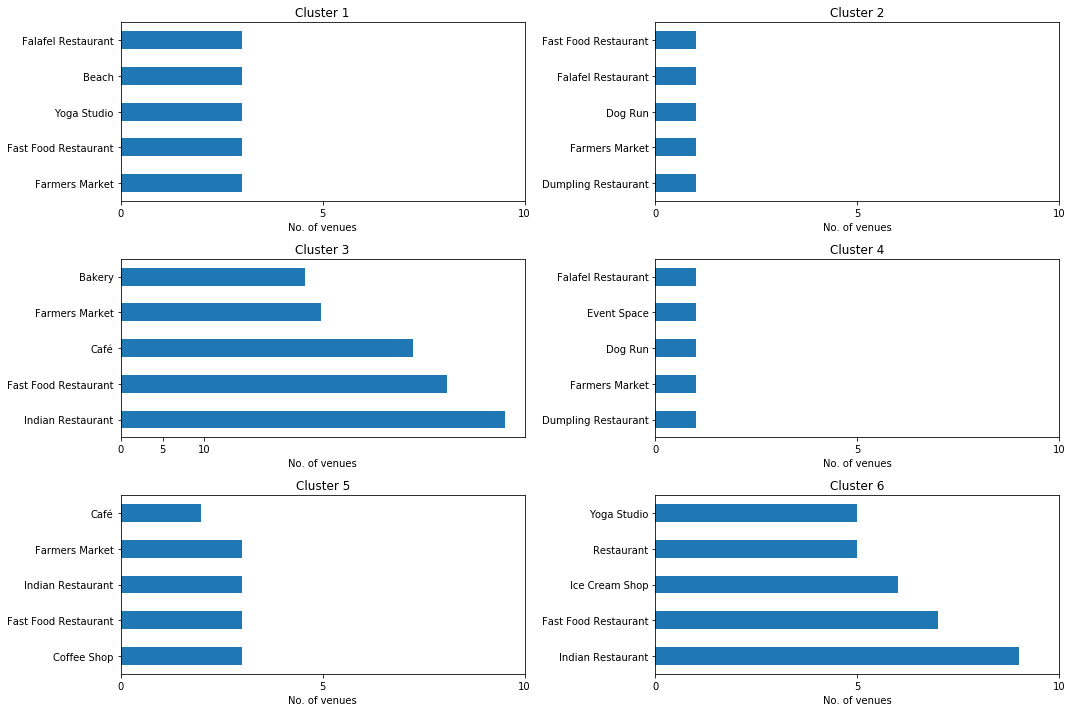

In [101]:
df_list = [venues1 ,venues2, venues3, venues4, venues5, venues6]
fig, axes = plt.subplots(3, 2)

count = 0
for r in range(3):
    for c in range(2):
        df_list[count].value_counts().head().plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('Cluster {}'.format(count+1))
        plt.sca(axes[r, c])
        plt.xticks(np.arange(0,15, 5))
        plt.xlabel('No. of venues')
        count += 1

fig.tight_layout()

This plot can be used to suggest valuable information to Business persons. Let's discuss a few examples considering they would like to start the following category of business.

#### 1. Hotel

The neighborhoods in cluster 2 has the greatest number of hotels, hence opening one here is not the best choice. So, is it best to open one at the neighborhoods in cluster 7 or 8? Not likely, since the place has a smaller number of food restaurants. Thus, an optimal place would be one which has less hotels, but also have restaurants and other places to explore. Considering all these facts, the best choice would be Cluster 3 and Cluster 4. such as the Adyar Bus Depot, Triplicane neighborhoods.

#### 2. Shopping Mall

The neighborhoods 5 has notable number of shopping malls. By using the same procedure as above, the suitable cluster would be the Cluster 2 and Cluster 3, since it has not much shopping malls and also it has many Hotels and Restaurants which gives an advantage.

Similarly, based on the requirement suggestions can be provided about the neighborhood that would be best suitable for the business.